# Example 3: Binary Mixture with a Tangent Pinch

#### This example shows the distillation column for a mixture of Benzene and Ethylenediamine
#### Like Exmaple1, this is a binary mixture, with the Reflux Ratio as the primary factor determining column feasability,  However, the shape of the equilibrium cuvre leads to an additional constraint on the Reflux Ratio due at a pinch point -- a new type of Fixed Point

In [1]:
## IMPORT NECESSARY LIBRARIES ##
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from distillation.DistillationBinary import DistillationModelBinary
from IPython.display import clear_output
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from thermo_models.VLEEmpiricalModel import *
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output
import matplotlib.pyplot as plt


### Demo 1: Equilibrium Curve Shape

##### Note the difference in the shape of this Equilibrium Curve.  In Example 1, the curve was Concave-Down over the whole range.  However, in this example, the curve has an inflection point.  This inflection can cause a tangent pinch between the Equlibrium Curve and Rectifying Line, which will be explored in this Example.

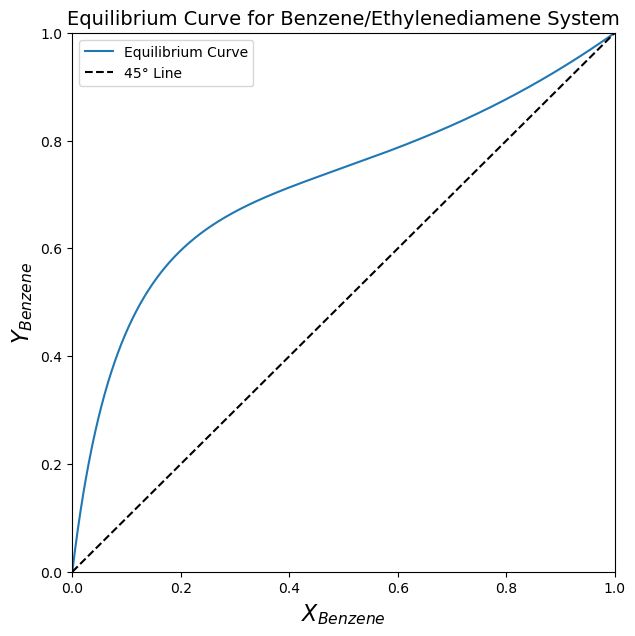

In [2]:
#Define empirical relationship
def xtoy(x):
    a, b = 9, -0.6
    y = a*x/(1+(a-1)*x) +b*x*(1 - x)
    return y

x_axis = np.linspace(0,1,1000)
y_equib = []
for i in range(len(x_axis)):
    y_equib.append(xtoy(x_axis[i]))
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x_axis, y_equib, label = 'Equilibrium Curve')
ax.plot(x_axis, x_axis, color = 'k', linestyle = '--', label = '45° Line')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("$X_{Benzene}$", fontsize = 16)
ax.set_ylabel("$Y_{Benzene}$", fontsize = 16)
ax.set_title("Equilibrium Curve for Benzene/Ethylenediamene System", fontsize = 14)
ax.legend()
plt.show()


In [3]:
# Create a Raoult's law object
vle_model = VLEEmpiricalModelBinary(xtoy,["Benzene","x2"])

# Define the sliders:
xD1_slider = widgets.FloatSlider(value=0.95, min=0.5, max=0.999, step=0.0001, description='$x_D$:', readout_format='.2f')
xB1_slider = widgets.FloatSlider(value=0.05, min=0, max=0.5, step=0.0001, description='$x_B$:', readout_format='.2f')
R1_slider =  widgets.FloatLogSlider(value=1.0, base=10, min=-1, max=1, step=0.001,  description='Reflux Ratio:', readout_format='.1f')
R2_slider =  widgets.FloatSlider(value=1.00, min=0.8, max=1.2, step=0.0001, description='Reflux Ratio:', readout_format='.2f')

def plot_distil_oplines_ex2(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModelBinary(vle_model, xF = np.array([0.5, 0.5]), xD = np.array([xD, 1 - xD]), xB = np.array([xB, 1 - xB]), reflux = R)
    fig, axs = plt.subplots(2, 3, figsize=(15, 5), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model.plot_distil_strip_binary(axs[0][0], axs[1][0])
    distillation_model.plot_distil_rect_binary(axs[0][1], axs[1][1])
    distillation_model.plot_distil_binary(axs[0][2], axs[1][2])
    plt.subplots_adjust(hspace=0)
    plt.show()  # Ensure the plot is displayed in Jupyter.

def plot_distil_stripping_ex2(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed.
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model = DistillationModelBinary(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    distillation_model.plot_distil_strip_binary(ax=axs[0], ax_fixed=axs[1])
    plt.subplots_adjust(hspace=0)
    plt.show()  # This is essential for the plot to be displayed in the Output widget in Jupyter.

def plot_distil_rectifying_ex2_demo2(xD=0.95, xB=0.05, R=R2_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModelBinary(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    fig, axs = plt.subplots(2, 2, figsize=(14, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')

    distillation_model.plot_distil_rect_binary(ax=axs[0, 0], ax_fixed=axs[1, 0])
    distillation_model.plot_distil_rect_binary(ax=axs[0, 1], ax_fixed=axs[1, 1], zoom_factor = 1, rect_title = "Zoomed in View of Tangent Pinch")
    
    plt.subplots_adjust(hspace=0, wspace=0.4)  # Adjust spacing between subplots
    
    plt.show()  # Ensure the plot is displayed in Jupyter.

def plot_distil_rectifying_ex2_demo3(xD=0.95, xB=0.05, R=R2_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModelBinary(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model.plot_distil_rect_binary(ax=axs[0], ax_fixed=axs[1])
    plt.subplots_adjust(hspace=0)  
    plt.show()  # Ensure the plot is displayed in Jupyter.
    
out_strip = Output()
out_rect2 = Output()
out_rect3 = Output()
out_oplines = Output()


###  Demo 2: Rectifying Pinch Region

##### The inflection point in the equilibrum curve restricts the range of feasible reflux rations when the Distillate Composition $x_D$ is sufficiently high (set at 0.95 for this Demo).  This demo shows the full graph, and then a zoomed in view of the tangent pinch region

#### Move the Reflux Ratio to see how it affects the number of stages near the pinch point.  The minimum reflux ratio is approximately 0.98.  Look at the Fixed Points at Reflux Ratios below this value.  You will notice there are now 3 Fixed Points! 

In [4]:
# Create your interactive widget but don't display it
rect_plot = interactive(plot_distil_rectifying_ex2_demo2, xD=0.95, xB=0.05, R=R2_slider, continuous_update=False)

# Define your button click behavior
def on_rect_button_click(b):
    with out_rect2:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_rectifying_ex2_demo2(xD=0.95, xB=0.05, R=R2_slider.value)

rect_button = Button(description='Generate Plot')
rect_button.on_click(on_rect_button_click)

layout = VBox([R2_slider, rect_button, out_rect2])
display(layout)

### Demo 3: Low Distillate Purity

##### While the Reflux Ratio may seem like the parameter that determines feasability, the Distillate Composition $x_D$ can also determine feasability.

##### Here $x_D$ is set to equal 0.80, making the tangent pinch no longer a concern. Changing the column parameters to move away from the tangent pinch region is a valid method for avoiding column infeasability.

In [5]:
# Create your interactive widget but don't display it
rect_plot = interactive(plot_distil_rectifying_ex2_demo3, xD=0.80, xB=0.05, R=R1_slider, continuous_update=False)

# Define your button click behavior
def on_rect_button_click(b):
    with out_rect3:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_rectifying_ex2_demo3(xD=0.80, xB=0.05, R=R1_slider.value)

rect_button = Button(description='Generate Plot')
rect_button.on_click(on_rect_button_click)

layout = VBox([R1_slider, rect_button, out_rect3])
display(layout)

### Demo 4: Full Distillation Column

##### This demonstration shows the previous graphs, as well as a third graph on the right for the entire distillation column.  The color of the operating lines shows changes based on the set parameters.  Green operating lines indicate a feasible column.  Black operating lines mean the column is not feasible due to a tangent pinch.  Try to adjust the parameters to create such a column.  How mayn fixed points are there?
##### Red operating lines also mean the column is not feasible due to a reflux ratio below the minimum possible value.  However, these were not caused by the tangent pinch point of the graph.  How many fixed points do you count for these columns?

###### Note that not all of the symbols on the x-axis correspond to real stage equilibria in the column.

In [6]:
# Create your interactive widget but don't display it
oplines_plot = interactive(plot_distil_oplines_ex2, xD=xD1_slider, xB=xB1_slider, R=R1_slider, continuous_update=False)

# Define your button click behavior
def on_oplines_button_click(b):
    with out_oplines:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_oplines_ex2(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value)

oplines_button = Button(description='Generate Oplines Plot')
oplines_button.on_click(on_oplines_button_click)

layout_oplines = VBox([HBox(oplines_plot.children[:-1]), oplines_button, out_oplines])
display(layout_oplines)

### Demo 5: Arclength Continuation